# Загрузка датасета

In [1]:
# Подгружаем нужные для работы библиотеки

from sklearn.preprocessing import LabelEncoder
from IPython.display import display, HTML
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from scipy.stats import skew

from typing import List
import seaborn as sns
import pandas as pd
import numpy as np
import kagglehub
import os

In [2]:
# Загрузка датасета

path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

# Проверка названия файла в категории

print(os.listdir(path))

['StudentPerformanceFactors.csv']


In [3]:
df_main: pd.DataFrame = pd.read_csv(path + '/StudentPerformanceFactors.csv')

# Копия датасета для анализа

df = df_main.copy()


In [4]:
# вывод для теста

df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Проверка качества данных

и тренировки с переменными (для домашней работы №2)

In [5]:
# Поиск нулевых данных в столбцах

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
# Проверим на уникальные данные и систематизируем их

from typing import List

for col in df.columns:
    unique_count: int = df[col].nunique()  # Количество уникальных значений для каждого столбца
    unique_values: List = df[col].unique().tolist()  # Список уникальных значений для каждого столбца
    
    # Проверяем, все ли значения можно преобразовать в числа (чтобы отсеять числовые поля)
    is_numeric: bool = pd.to_numeric(df[col], errors='coerce').notnull().all()
    
    if is_numeric:
        print(f"Столбец '{col}': уникальных значений {unique_count} — цифровые значения")
    else:
        print(f"Столбец '{col}': уникальных значений {unique_count} — {unique_values[:5]}")


Столбец 'Hours_Studied': уникальных значений 41 — цифровые значения
Столбец 'Attendance': уникальных значений 41 — цифровые значения
Столбец 'Parental_Involvement': уникальных значений 3 — ['Low', 'Medium', 'High']
Столбец 'Access_to_Resources': уникальных значений 3 — ['High', 'Medium', 'Low']
Столбец 'Extracurricular_Activities': уникальных значений 2 — ['No', 'Yes']
Столбец 'Sleep_Hours': уникальных значений 7 — цифровые значения
Столбец 'Previous_Scores': уникальных значений 51 — цифровые значения
Столбец 'Motivation_Level': уникальных значений 3 — ['Low', 'Medium', 'High']
Столбец 'Internet_Access': уникальных значений 2 — ['Yes', 'No']
Столбец 'Tutoring_Sessions': уникальных значений 9 — цифровые значения
Столбец 'Family_Income': уникальных значений 3 — ['Low', 'Medium', 'High']
Столбец 'Teacher_Quality': уникальных значений 3 — ['Medium', 'High', 'Low', nan]
Столбец 'School_Type': уникальных значений 2 — ['Public', 'Private']
Столбец 'Peer_Influence': уникальных значений 3 — ['P

# Задача: Исходя из наличия таких столбцов как Previous_Scores Exam_Score требуется устновить завсисимость изменения оценок от внешних факторов студентов

# Вывод: Исходя из данных по нулевым/"nan" значениям и уникальности данных мы видим, что нулевые/"nan" значения есть только в столбцах Teacher_Quality, Parental_Education_Level,Distance_from_Home. Но так как данные не связаны между собой, то удалять строки с "nan" значениями в этих столбцах мы не будем. Но   при расчете непорственно зависимости оценок за экзамен от данных факторов значения "nan" мы учитывать не будем, т.к их нельзя отнести однозначно к какой либо категории и объединять их в отдельную категорию не имеет смысла.

In [7]:
df['average_score'] = (df['Previous_Scores'] + df['Exam_Score'])/2    # Присваивание и мат функции

In [8]:
df['average_score'] 

0       70.0
1       60.0
2       82.5
3       84.5
4       67.5
        ... 
6602    72.0
6603    75.0
6604    66.5
6605    79.5
6606    79.0
Name: average_score, Length: 6607, dtype: float64

In [9]:
average_score_mean: float = df['average_score'].mean()                 # типизация/аннотация
print(f"Средняя оценка всех студентов по резльтатам обоих экзаменов {average_score_mean:.2f}")

Средняя оценка всех студентов по резльтатам обоих экзаменов 71.15


In [10]:
df['Tutoring_Sessions'].describe()

count    6607.000000
mean        1.493719
std         1.230570
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: Tutoring_Sessions, dtype: float64

# Вывод: Судя по распределению данных Tutoring_Sessions - это кол-во посещений репетиторов(занятий)

In [11]:
df['Physical_Activity'].describe() 

count    6607.000000
mean        2.967610
std         1.031231
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Physical_Activity, dtype: float64

In [12]:
df['Physical_Activity'].value_counts()

Physical_Activity
3    2545
2    1627
4    1575
1     421
5     361
0      46
6      32
Name: count, dtype: int64

# Вывод: Судя по распределению данных Physical_Activity - это кол-во занятий  физ. активностью в неделю (без учета времени занятий)

In [13]:
# отдельно проверим распределение для столбцов первичных и финальных результатов

df['Exam_Score'].describe() 

count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

In [14]:
df['Previous_Scores'].describe()

count    6607.000000
mean       75.070531
std        14.399784
min        50.000000
25%        63.000000
50%        75.000000
75%        88.000000
max       100.000000
Name: Previous_Scores, dtype: float64

# Вывод: У данных есть небольшие перекосы т.к mean (среднее) больще медианы (50%). Поэтому можно попробовать проверить перекос

In [15]:
# Проверим коэффициент ассиметрии для Exam_Score

coef_last_exam: float = skew(df['Exam_Score'])
coef_last_exam


1.6444348378369054

In [16]:
coef_prev_exam: float = skew(df['Previous_Scores'])
coef_prev_exam

-0.003735685432260372

# Предварительный вывод: Для Exam_Score коэффициент положительный (значит смещение вправо) и сильно выше 1, что означает, что смещение значительное и стоит применить логарифимическое преобразование. А коэффициент для Previous_Score sотрицательны(т.е смещение влево)но значинение близко к 0, что означает, что смещение незначительно и не требует преобразований. Для самопроверки построим графики по базовым значениям а затем сделаем преобразование.


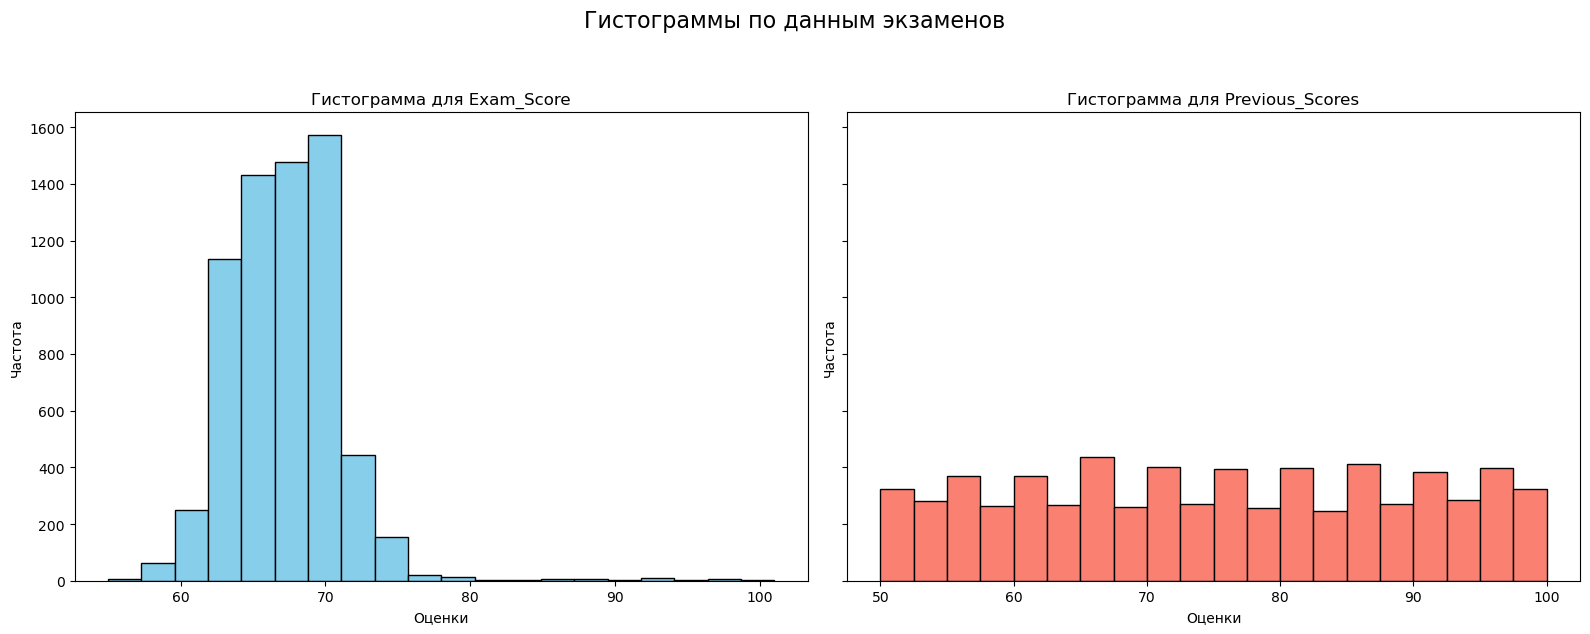

In [17]:
# Построение графиков

# Создаем 2 графика рядом
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Добавляем общий заголовок для всего ряда графиков
fig.suptitle(f'Гистограммы по данным экзаменов', fontsize=16, y=1.05)

# Строим гистограмму для Exam_Score
axes[0].hist(df['Exam_Score'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Гистограмма для Exam_Score')
axes[0].set_xlabel('Оценки')
axes[0].set_ylabel('Частота')

# Строим гистограмму для Previous_Scores
axes[1].hist(df['Previous_Scores'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Гистограмма для Previous_Scores')
axes[1].set_xlabel('Оценки')
axes[1].set_ylabel('Частота')

# Показываем графики
plt.tight_layout()
plt.show()

# Вывод: Расчеты подтвердились и у Exam_Score ярковыраженное положительное правостороннее смещение. А у Previous_Scores - фактически симметиричное распределение. Поэтому применим логарифмическое преобразование к Exam_Score.

In [18]:
# Выполним логарифмическое преобразование воспользовавшись методом библиотеки numpy

df['log_Exam_Score'] = np.log1p(df['Exam_Score'])  # на заметку себе   log1p(x) — это log(x + 1) т.к Exam_Score может быть нулевым а log(0) - вызовет ошибку т.к неопределн
skew(df['log_Exam_Score'])

0.9880685685172577

# Коэффициент ниже но все еще высокий. Построим гистограмму.

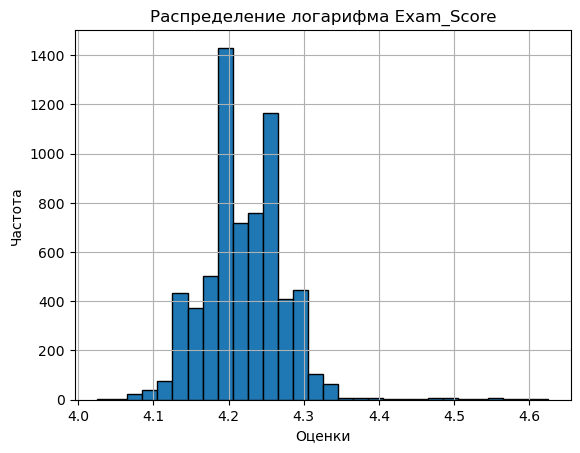

In [19]:
df['log_Exam_Score'].hist(bins=30, edgecolor='black')
plt.title('Распределение логарифма Exam_Score')
plt.xlabel('Оценки')
plt.ylabel('Частота')
plt.show() 

# Вывод: Преобразование не помогло, т.к мы не избавились от выбросов котрые у нас имеются (отчетливо видный "хвост" справана графиках). И это ошибка т.к этонадо делать в первую очередь. Поэтому надо избавиться от выбросов

# Для этого попробуем использовать два разных метода "Метод стандартного отклонения (STD)" и "Метод IQR (межквартильный размах) для определения оптимального.

In [20]:
# Функция для удаления выбросов с использованием стандартного отклонения

def remove_outliers_STD(df: pd.DataFrame, numerical_columns: List[str]) -> pd.DataFrame:
    """
    Удаляет выбросы в числовых столбцах DataFrame, используя метод стандартного отклонения.
    
    Параметры:
    df (pd.DataFrame): DataFrame, содержащий данные.
    numerical_columns (List[str]): Список имен столбцов, содержащих числовые данные.

    Возвращает:
    pd.DataFrame: DataFrame с удаленными выбросами.
    """
    for col in numerical_columns:
        
        mean:float = df[col].mean()  # вычисляем среднее
        std:float = df[col].std()  # вычисляем стандартное отклонение
        threshold_upper:float = mean + 3 * std  # верхняя граница
        threshold_lower:float = mean - 3 * std  # нижняя граница
        df = df[(df[col] >= threshold_lower) & (df[col] <= threshold_upper)]  # удаляем выбросы
        
        # Заменяем выбросы на NaN
        df[col] = df.apply(lambda x: x[col] if (x[col] >= threshold_lower) and (x[col] <= threshold_upper) else np.nan, axis=1)
        
    return df

In [21]:
# Функция для удаления выбросов с использованием IQR

def remove_outliers_IQR(df: pd.DataFrame, numerical_columns: List[str]) -> pd.DataFrame:
    """
    Удаляет выбросы в числовых столбцах DataFrame, используя метод IQR (межквартильный размах).
    
    Параметры:
    df (pd.DataFrame): DataFrame, содержащий данные.
    numerical_columns (List[str]): Список имен столбцов, содержащих числовые данные.

    Возвращает:
    pd.DataFrame: DataFrame с удаленными выбросами.
    """
    
    for col in numerical_columns:
        
        Q1:float = df[col].quantile(0.25)  # первый квартиль
        Q3:float = df[col].quantile(0.75)  # третий квартиль
        IQR:float = Q3 - Q1  # межквартильный размах
        lower_bound:float = Q1 - 1.5 * IQR  # нижняя граница для выбросов
        upper_bound:float = Q3 + 1.5 * IQR  # верхняя граница для выбросов
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # удаляем выбросы

        # Заменяем выбросы на NaN (а надо ли)
        df[col] = df.apply(lambda x: x[col] if (x[col] >= lower_bound) and (x[col] <= upper_bound) else np.nan, axis=1)
        
    return df


In [22]:
def add_filtered_columns(df: pd.DataFrame, numerical_columns: List[str]) -> pd.DataFrame:
    """
    Добавляет отфильтрованные столбцы с пометкой '_filtered' в базовый датасет.

    Параметры:
    df (pd.DataFrame): DataFrame, содержащий данные.
    numerical_columns (List[str]): Список имен столбцов с отфильтрованными данными.

    Возвращает:
    pd.DataFrame: Базовый DataFrame с добавленными столбцами.
    """
    
    # Добавляем столбцы с пометкой '_filtered'
    for col in numerical_columns:
        # данные уже отфильтрованы (в том числе NaN для выбросов)
        df[f'{col}_filtered'] = df[col]
    
    return df

In [23]:
# Применим функции к нашим данным

numerical_columns = ['Exam_Score']

# Применение метода STD
df_std_filtered: pd.DataFrame = remove_outliers_STD(df.copy(), numerical_columns)

# Применение метода IQR
df_iqr_filtered: pd.DataFrame = remove_outliers_IQR(df.copy(), numerical_columns)

In [24]:
# Посчитаем коэффициенты ассиметрии для обоих методов и построим их графики

print(f'Коэффициент для метода стандартного отклонения: {skew(df_std_filtered['Exam_Score'])}')
print(f'Коэффициент для метода межквантильного размаха: {skew(df_iqr_filtered['Exam_Score'])}')

Коэффициент для метода стандартного отклонения: 0.005416355060741192
Коэффициент для метода межквантильного размаха: 0.0052931993928564


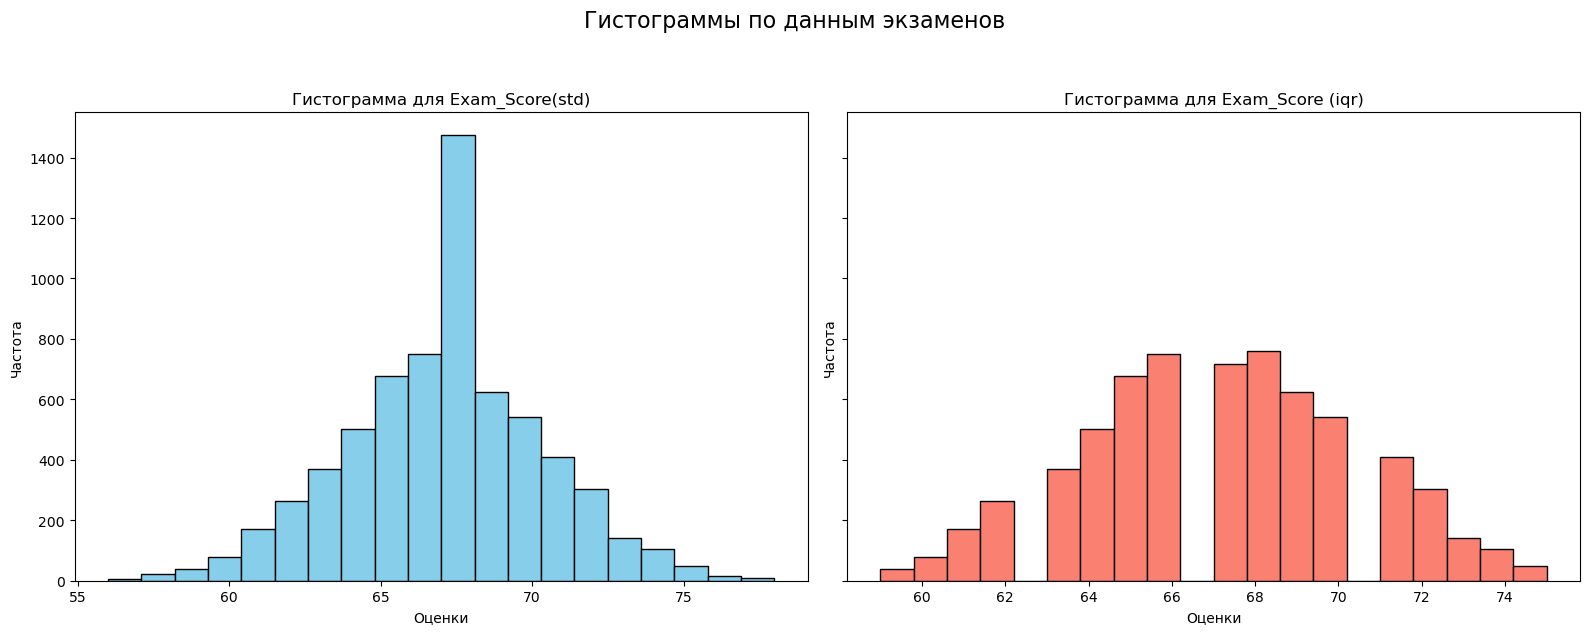

In [25]:
# Построение графиков

# Создаем 2 графика рядом
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Добавляем общий заголовок для всего ряда графиков
fig.suptitle(f'Гистограммы по данным экзаменов', fontsize=16, y=1.05)

# Строим гистограмму для Exam_Score
axes[0].hist(df_std_filtered['Exam_Score'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Гистограмма для Exam_Score(std)')
axes[0].set_xlabel('Оценки')
axes[0].set_ylabel('Частота')

# Строим гистограмму для Previous_Scores
axes[1].hist(df_iqr_filtered['Exam_Score'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Гистограмма для Exam_Score (iqr)')
axes[1].set_xlabel('Оценки')
axes[1].set_ylabel('Частота')

# Показываем графики
plt.tight_layout()
plt.show()

# Коэффициенты получились практически одинаковыми и с минимальным смещением. А вот по графику видно что лучше использовать мтеод стандартного отклонения, т.к он не исключил большу часть данных студентов имеющих оценки 67, а вот метод IRQ посчитал их выбросами. Что в данном случае не правильно. И для имеющихся данных подвергать их преобразованию не требуется. Поэтому результаты добавляем в спецальный столбец (с пометкой фильтр).


In [26]:
# Применим функциб добавлений фильтрованных столбцов

numerical_columns = ['Exam_Score']

df: pd.DataFrame = add_filtered_columns(df, numerical_columns)

# Проверим добавление 

df['Exam_Score_filtered'].head()

0    67
1    61
2    74
3    71
4    70
Name: Exam_Score_filtered, dtype: int64

In [27]:
# Данные отображдаются значит столбец присутствует в базовом датасете

# Рассмотрим зависимости результатов экзаменов от внешних факторов.

# Вначале сделаем корреляционную матрицу и посмотрим как факторы влияют/зависят друг отдруга и на экзаменационные оценки.

# Корреляционная матрица для числовых данных

In [28]:
# Сначала ролучаем список числовых столбцов для последующего создания корреляционной матрицы

columns_list: List[str] = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score_filtered']


correlation_matrix = df[columns_list].corr()
correlation_matrix

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score_filtered
Hours_Studied,1.000000,-0.009908,0.010977,0.024846,-0.014282,0.004624,0.445455
Attendance,-0.009908,1.000000,-0.015918,-0.020186,0.014324,-0.022435,0.581072
Sleep_Hours,0.010977,-0.015918,1.000000,-0.021750,-0.012216,-0.000378,-0.017022
Previous_Scores,0.024846,-0.020186,-0.021750,1.000000,-0.013122,-0.011274,0.175079
Tutoring_Sessions,-0.014282,0.014324,-0.012216,-0.013122,1.000000,0.017733,0.156525
Physical_Activity,0.004624,-0.022435,-0.000378,-0.011274,0.017733,1.000000,0.027824
Exam_Score_filtered,0.445455,0.581072,-0.017022,0.175079,0.156525,0.027824,1.000000


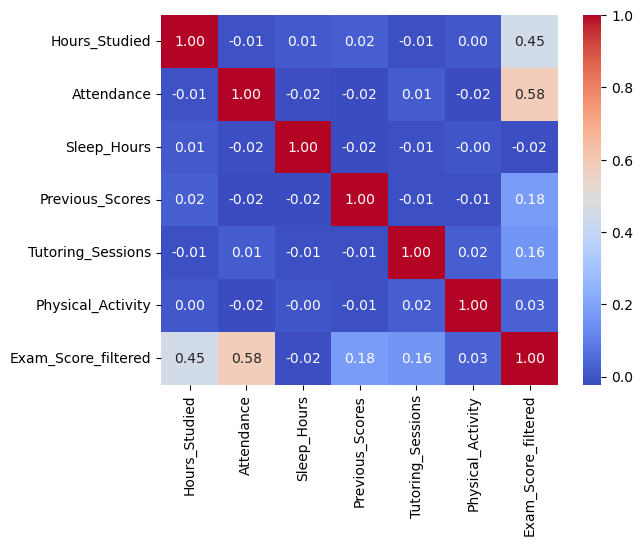

In [29]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Вывод: Исходя из полученных данных видно, что друг на друга факторы почти не виляют. А если и влияют то только на оценки за экзамен. И только Hours_Studied и Attendance значительно влияют на оценки. Значит их и будем рассматривать. Время сна очевидно влияние на оценки не имеет.

# Корреляционная матрица для категорийных данных

In [30]:
# Теперь проверим категорийные столбцы (для этого расчитаем коэффициент Крамера)

# Функция для расчета коэффициента Крамера

def cramers_v(x: pd.Series, y: pd.Series) -> float:
    """
    Рассчитывает коэффициент Крамера для двух категориальных переменных.

    Parameters:
    x: pd.Series - первая категориальная переменная
    y: pd.Series - вторая категориальная переменная

    Returns:
    float - значение коэффициента Крамера
    """
    # Создаем таблицу сопряженности
    confusion_matrix = pd.crosstab(x, y)
    
    # Выполняем тест хи-квадрат
    chi2 = chi2_contingency(confusion_matrix)[0]
    
    # Общее количество элементов
    n = confusion_matrix.sum().sum()
    
    # Расчет φ²
    phi2 = chi2 / n
    
    # Размеры таблицы сопряженности
    r, k = confusion_matrix.shape
    
    # Возвращаем коэффициент Крамера
    return np.sqrt(phi2 / min(r - 1, k - 1))

# Функция для расчета матрицы коэффициента Крамера и добавления столбца Exam_Score
def calculate_cramers_matrix_with_numerical(df: pd.DataFrame, numerical_column: str) -> pd.DataFrame:
    """
    Рассчитывает матрицу корреляции Крамера для всех категориальных переменных и добавляет корреляцию с числовым столбцом.

    Parameters:
    df: pd.DataFrame - входной DataFrame с данными
    numerical_column: str - имя числового столбца для добавления в корреляционную матрицу

    Returns:
    pd.DataFrame - обновленная матрица корреляции
    """
    # Получаем все категориальные столбцы
    categorical_columns: List[str] = df.select_dtypes(include=['object', 'category']).columns.tolist()


    # Кодируем категориальные переменные в числовые (т.к иначне будут разные типы данных числа и строки)
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])

    # Добавляем столбец 'Exam_Score' в категориальные переменные для расчета корреляции
    categorical_columns.append(numerical_column)

    # Создаем пустую матрицу для результатов
    correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

    # Заполняем матрицу значениями коэффициента Крамера для категориальных переменных
    for col1 in categorical_columns:
        for col2 in categorical_columns:
            if col1 == col2:  # Если это одинаковые столбцы, то корреляция равна 1
                correlation_matrix.loc[col1, col2] = 1
            elif col1 == numerical_column or col2 == numerical_column:
                # Для корреляции с числовым столбцом используем корреляцию Пирсона
                correlation_matrix.loc[col1, col2] = df[col1].corr(df[col2])
            else:
                # Для других категориальных столбцов используем коэффициент Крамера
                correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

    return correlation_matrix

# Применяем функцию для создания матрицы
numerical_column = 'Exam_Score'  # Название числового столбца
cramers_matrix_with_numerical = calculate_cramers_matrix_with_numerical(df.copy(), numerical_column)

# Результат
cramers_matrix_with_numerical


,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
Parental_Involvement,1,0.027429,0.025371,0.018186,0.015715,0.017221,0.014535,0.021746,0.02001,0.010841,0.016767,0.019602,0.024995,-0.094289
Access_to_Resources,0.027429,1,0.018254,0.016873,0.015138,0.020058,0.01922,0.030929,0.011494,0.006413,0.018309,0.021998,0.007454,-0.090503
Extracurricular_Activities,0.025371,0.018254,1,0.016214,0.004761,0.015971,0.023353,0.00532,0.033519,0.007786,0.017423,0.026242,0.007633,0.064382
Motivation_Level,0.018186,0.016873,0.016214,1,0.020341,0.016396,0.032288,0.013812,0.018748,0.019336,0.021898,0.021388,0.015159,-0.01491
Internet_Access,0.015715,0.015138,0.004761,0.020341,1,0.018028,0.002042,0.012163,0.01069,0.005583,0.028605,0.010631,0.014559,0.051475
Family_Income,0.017221,0.020058,0.015971,0.016396,0.018028,1,0.019874,0.014891,0.014239,0.016431,0.012115,0.023036,0.002046,-0.026484
Teacher_Quality,0.014535,0.01922,0.023353,0.032288,0.002042,0.019874,1,0.008049,0.016535,0.010803,0.024183,0.028566,0.020807,-0.061772
School_Type,0.021746,0.030929,0.00532,0.013812,0.012163,0.014891,0.008049,1,0.013386,0.0,0.032686,0.016068,0.003844,-0.008844
Peer_Influence,0.02001,0.011494,0.033519,0.018748,0.01069,0.014239,0.016535,0.013386,1,0.013989,0.026943,0.018936,0.018966,0.100217
Learning_Disabilities,0.010841,0.006413,0.007786,0.019336,0.005583,0.016431,0.010803,0.0,0.013989,1,0.022823,0.009327,0.014681,-0.085066


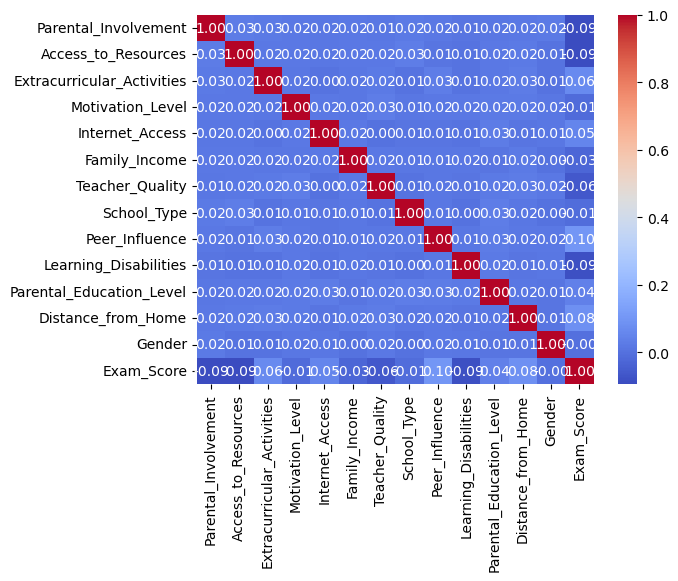

In [31]:
# Преобразуем значения в числовой формат (т.к несмотря на то что визуально в таблице числа, это могут быть и строки)
cramers_matrix_with_numerical = cramers_matrix_with_numerical.astype(float)

sns.heatmap(cramers_matrix_with_numerical, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Вывод: Категорийные данные почти не связаны друг с другом и довольно слабо влияют на оценку на экзамене. Поэтому все эти факторы смет смысл объеденить в  1-2 группы и построить график непосредственно для группы данных.

# Анализ оценок до выборки и после экзамена

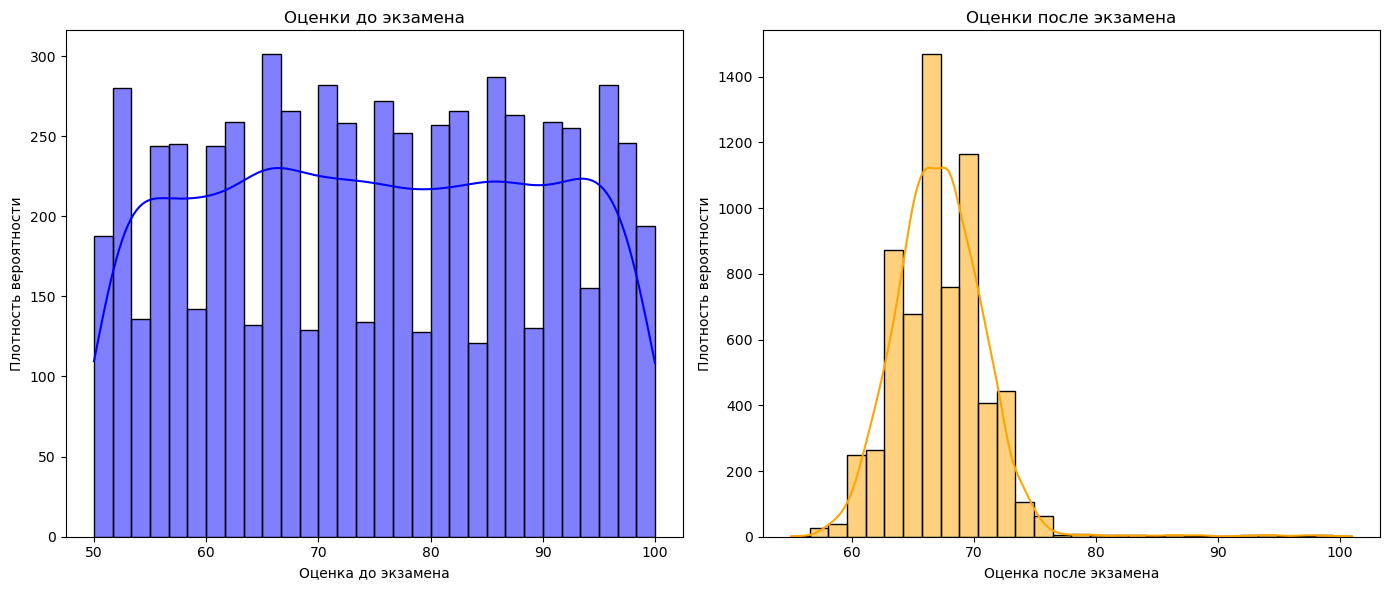

In [32]:
# Два графика для Previous_Scores и Exam_Score

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма для Previous_Scores

sns.histplot(df['Previous_Scores'], kde=True, color='blue', ax=axes[0], bins=30)
axes[0].set_title('Оценки до экзамена')
axes[0].set_xlabel('Оценка до экзамена')
axes[0].set_ylabel('Плотность вероятности')

# Гистограмма для Exam_Score

sns.histplot(df['Exam_Score_filtered'], kde=True, color='orange', ax=axes[1], bins=30)
axes[1].set_title('Оценки после экзамена')
axes[1].set_xlabel('Оценка после экзамена')
axes[1].set_ylabel('Плотность вероятности')

plt.tight_layout()
plt.show()

# Вывод: базовые оценки студентов выгядят почти равномерными, а после экзамена - нет.

# Проверим завсисимость оценок(Exam_Score) от часов учебы (Hours_Studied) и начального уровня (Previous_Scores)

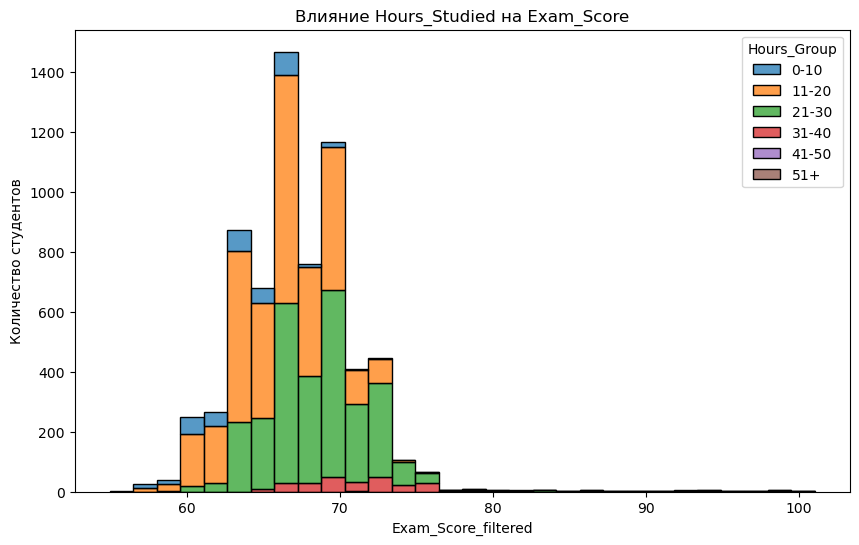

In [33]:
# Построим гистограмму для оценки зависимости

plt.figure(figsize=(10, 6))
df['Hours_Group'] = pd.cut(df['Hours_Studied'], bins=[0, 10, 20, 30, 40, 50, 60], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51+'])
sns.histplot(df, x='Exam_Score_filtered', hue='Hours_Group', multiple='stack', bins=30)

plt.title('Влияние Hours_Studied на Exam_Score')
plt.xlabel('Exam_Score_filtered')
plt.ylabel('Количество студентов')
plt.show()

# Вывод: из данного распередления сложно оценить зависисмоть. Одинаковые оценки имею и те кто занимался больше часов и те то занимался менбше часов. Нужно попробовать построить график с выделением

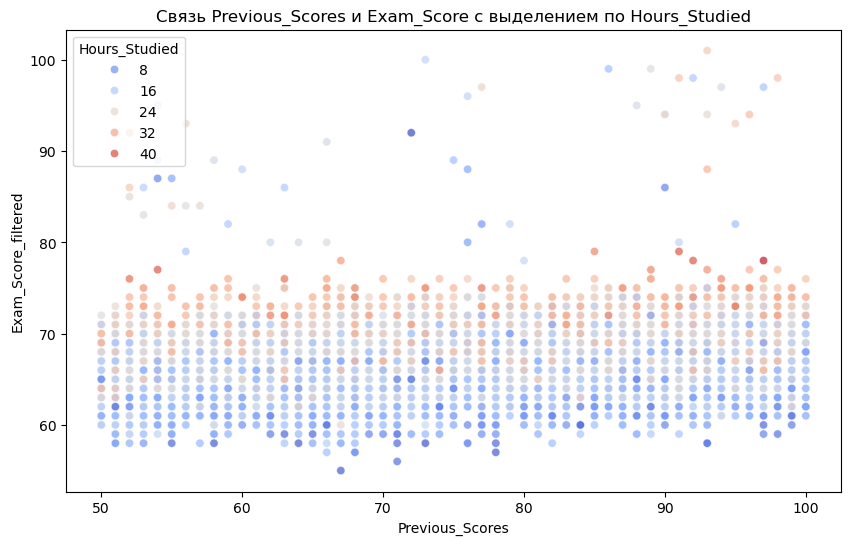

In [34]:
 # Строим график с выделением

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='Previous_Scores', y='Exam_Score', hue='Hours_Studied', palette='coolwarm', alpha=0.7)
plt.title('Связь Previous_Scores и Exam_Score с выделением по Hours_Studied')
plt.xlabel('Previous_Scores')
plt.ylabel('Exam_Score_filtered')
plt.legend(title='Hours_Studied')  # Легенда для цветовой кодировки
plt.show()

# Вывод:  То что график равномерен и кол-во часов затраченных на учебу показывает, что врядли это низкая квалификация учебного заведения. Скорее  тут разница в сложности экзамена (применительно для  СНГ разница между экзаменом в школе и приемным экзаменом в вузе). И получается, что нам и для дургих параметров нужно увидеть корреляцию между именно  Previous_Scores и Exam_Score и конкртеным факторам. т.к корреляция данных между студентами будет неправильной т.к у всех разная точка отсчета (т.е разная базовая оценка т.е разный базовый уровнь знаний)

# Создание обощенной переменной

In [35]:
# Для начала сделаем переменную котоаря будет содержать изменение оценок, чтобы не требовалоась строить графики с 3 переменными, т.к это затрудняет их анализ
# а не учитывание Previous_Scores приведет к ошибочным оценкам т.к вызовет искажения, вызванные различиями в начальных знаниях.

df['Score_Improvement'] = df['Exam_Score_filtered'] - df['Previous_Scores'] 

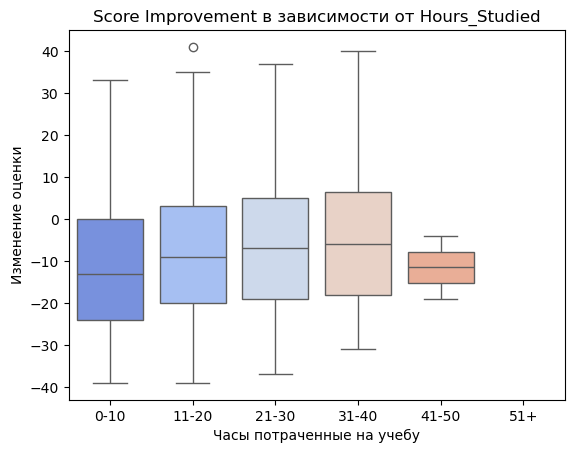

In [36]:
# Теперь попробуем построить графики зависимости
df['Hours_Group'] = pd.cut(df['Hours_Studied'], bins=[0, 10, 20, 30, 40, 50, 60], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51+'])

sns.boxplot(data=df, x='Hours_Group', y='Score_Improvement', hue='Hours_Group', palette='coolwarm', dodge=False, legend=False)
plt.title('Score Improvement в зависимости от Hours_Studied')
plt.xlabel('Часы потраченные на учебу')
plt.ylabel('Изменение оценки')
plt.show()

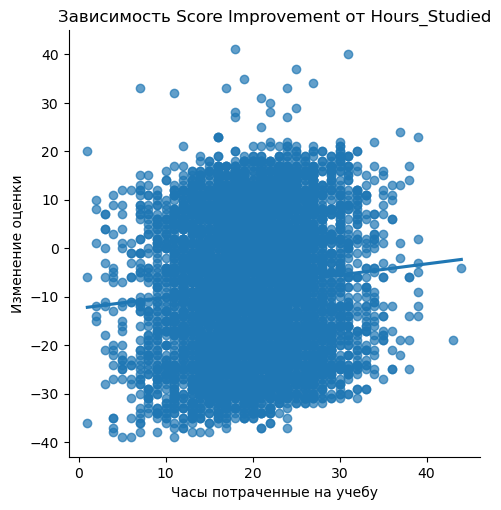

In [37]:
sns.lmplot(data=df, x='Hours_Studied', y='Score_Improvement', ci=None, scatter_kws={'alpha':0.7})
plt.title('Зависимость Score Improvement от Hours_Studied')
plt.xlabel('Часы потраченные на учебу')
plt.ylabel('Изменение оценки')
plt.show()

# Вывод: В целом график boxplot более нагляден и из из него получается, что большее кол-во часов позволяло получить оценку выше (ну или по крайней мере меньше потерять балов). Интересная аномалия для у тех кто занимался более 40 часов для них на графике boxplot выраженное ухудшение оценок. Но по графику lmplot видно что это выбросы. Для проверки гипотезы почистим выбросы методом стандартного отклонения и заново построим графики

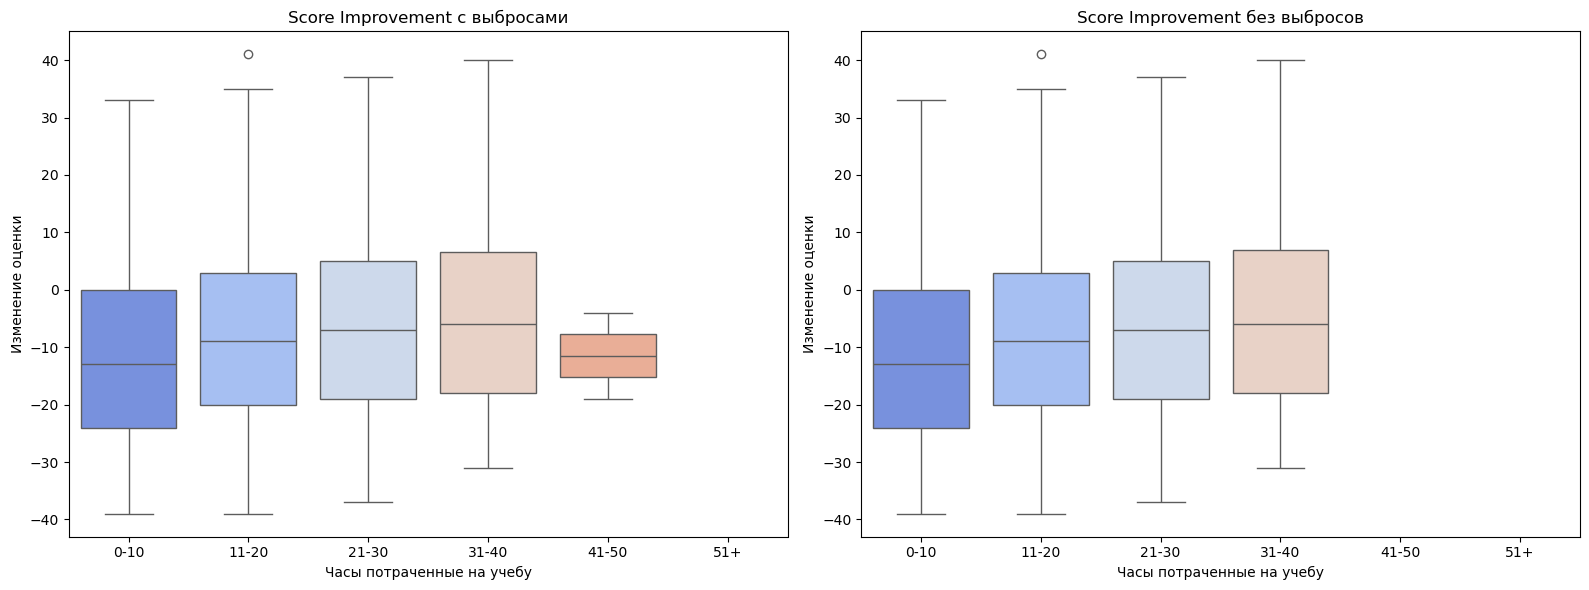

In [38]:
numerical_columns = ['Hours_Studied']

# Применение метода STD
df_std_filtered: pd.DataFrame = remove_outliers_STD(df.copy(), numerical_columns)

df_std_filtered['Hours_Group'] = pd.cut(df_std_filtered['Hours_Studied'], bins=[0, 10, 20, 30, 40, 50, 60], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51+'])

# Настройка размера фигуры и подграфиков
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 строка, 2 столбца графиков

# Исходный график с выбросами
sns.boxplot(data=df, x='Hours_Group', y='Score_Improvement', hue='Hours_Group', palette='coolwarm', dodge=False, ax=axes[0], legend=False)
axes[0].set_title('Score Improvement с выбросами')
axes[0].set_xlabel('Часы потраченные на учебу')
axes[0].set_ylabel('Изменение оценки')

# График без выбросов
sns.boxplot(data=df_std_filtered, x='Hours_Group', y='Score_Improvement', hue='Hours_Group', palette='coolwarm', dodge=False, ax=axes[1], legend=False)
axes[1].set_title('Score Improvement без выбросов')
axes[1].set_xlabel('Часы потраченные на учебу')
axes[1].set_ylabel('Изменение оценки')

# Отображение
plt.tight_layout()
plt.show()

# Второй график можно не строить, т.к теперь очевидно что  данные в группе 41-50 - выбросы. Значит наш вывод корректен -  большее кол-во часов позволяло получить оценку выше (ну или по крайней мере меньше потерять балов)

# Проверим зависимость обобщеной оценочной переменной (Score_Improvement) от посещаемости (Attendance)

In [39]:
# Cразу почистим посещаемость от выбросов

numerical_columns = ['Attendance']

# Применение метода STD
df_std_filtered: pd.DataFrame = remove_outliers_STD(df.copy(), numerical_columns)

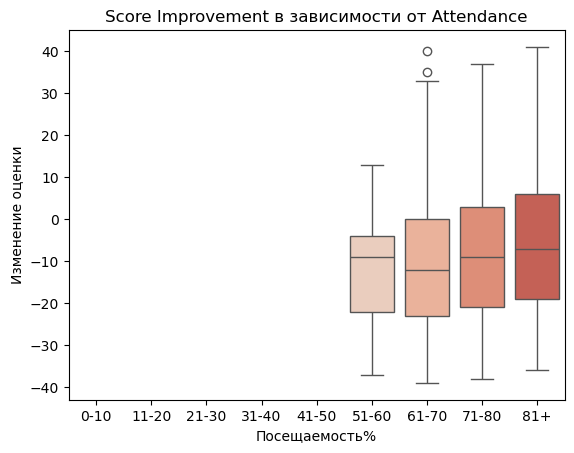

In [40]:
# Делаем группировку данных посещений (чтобы удобнее было видно на графике)

df_std_filtered['Attendance_Group'] = pd.cut(df_std_filtered['Attendance'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+'])

sns.boxplot(data=df_std_filtered, x='Attendance_Group', y='Score_Improvement', hue='Attendance_Group', palette='coolwarm', dodge=False, legend=False)
plt.title('Score Improvement в зависимости от Attendance')
plt.xlabel('Посещаемость%')
plt.ylabel('Изменение оценки')
plt.show()

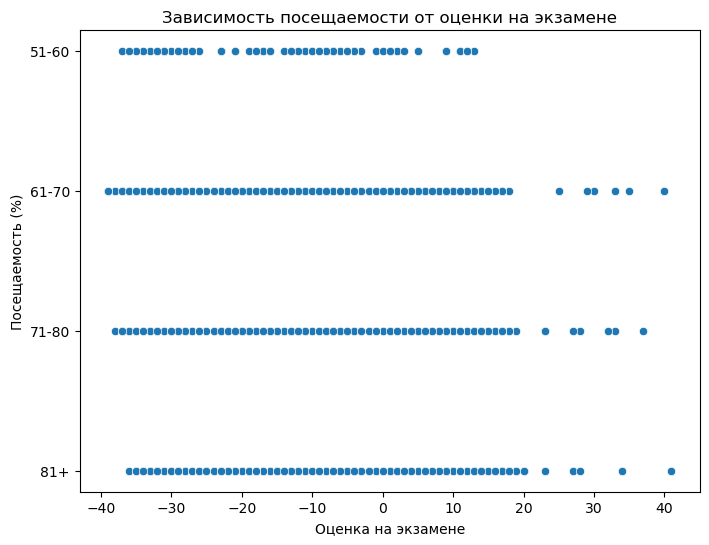

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Score_Improvement', y='Attendance_Group', data=df_std_filtered)
plt.title('Зависимость посещаемости от оценки на экзамене')
plt.xlabel('Оценка на экзамене')
plt.ylabel('Посещаемость (%)')
plt.show()

# Вывод: Низкая посещаемость - негативно сказывалась на оценках. Высокая посещаемость почти не вызывала улучшения оценок. Т,е отрицательное влияние плохой посещаемости - более выражено.

In [42]:
# Проверим зависимость обобщеной оценочной переменной (Score_Improvement) от  категорийных факторов

Разобьем  категорийный факторы на 3 группы влияющие на учебный процесс:

Факторы, влияющие на учебный процесс(educational_process):

    Parental_Involvement (вовлеченность родителей)
    Teacher_Quality (качество учителя)
    Extracurricular_Activities (внешкольные активности)
    Motivation_Level (уровень мотивации)
    Learning_Disabilities (обучающие нарушения)
    
Факторы, влияющие на общие условия жизни и доступ к ресурсам:

    Access_to_Resources (доступ к ресурсам)
    Internet_Access (доступ к интернету)
    Family_Income (доход семьи)
    Distance_from_Home (расстояние от дома)
    School_Type (тип школы)
    
Факторы, связанные с социальным окружением:

    Peer_Influence (влияние сверстников)
    Parental_Education_Level (уровень образования родителей)
    Gender (пол)

Вначале нам нужно нормализовать данные. т.е приветсив се данныые к однотипным значениям Для преобразования категорийных данных можно прикинуть их веса значений и перевсти данные в соответствии с этими весами. Будем пользоваться методмо корреляции


In [43]:
# Переводим данные в бинарные и затем проверяем корреляцию с Score_Improvement
parental_involvement_correlations = pd.get_dummies(df_std_filtered['Parental_Involvement'], prefix='Parental_Involvement').corrwith(df_std_filtered['Score_Improvement'])
teacher_quality_correlations = pd.get_dummies(df_std_filtered['Teacher_Quality'], prefix='Teacher_Quality').corrwith(df_std_filtered['Score_Improvement'])
extracurricular_activities_correlations = pd.get_dummies(df_std_filtered['Extracurricular_Activities'], prefix='Extracurricular_Activities').corrwith(df_std_filtered['Score_Improvement'])
motivation_level_correlations = pd.get_dummies(df_std_filtered['Motivation_Level'], prefix='Motivation_Level').corrwith(df_std_filtered['Score_Improvement'])
learning_disabilities_correlations = pd.get_dummies(df_std_filtered['Learning_Disabilities'], prefix='Learning_Disabilities').corrwith(df_std_filtered['Score_Improvement'])

# Нормализуем веса
parental_involvement_mapping = {col.split('_')[1]: corr for col, corr in parental_involvement_correlations.items() if 'Parental_Involvement' in col}
teacher_quality_mapping = {col.split('_')[1]: corr for col, corr in teacher_quality_correlations.items() if 'Teacher_Quality' in col}
extracurricular_activities_mapping = {col.split('_')[1]: corr for col, corr in extracurricular_activities_correlations.items() if 'Extracurricular_Activities' in col}
motivation_level_mapping = {col.split('_')[1]: corr for col, corr in motivation_level_correlations.items() if 'Motivation_Level' in col}
learning_disabilities_mapping = {col.split('_')[1]: corr for col, corr in learning_disabilities_correlations.items() if 'Learning_Disabilities' in col}

parental_involvement_corr = {k: v for k, v in parental_involvement_mapping.items()}
teacher_quality_corr = {k: v for k, v in teacher_quality_mapping.items()}
extracurricular_activities_corr = {k: v for k, v in extracurricular_activities_mapping.items()}
motivation_level_corr = {k: v for k, v in motivation_level_mapping.items()}
learning_disabilities_corr = {k: v for k, v in learning_disabilities_mapping.items()}


print("parental_involvement_corr:", parental_involvement_corr)
print("teacher_quality_corr :", teacher_quality_corr)
print("extracurricular_activities_corr :", extracurricular_activities_corr)
print("motivation_level_corr :", motivation_level_corr)
print("learning_disabilities_corr :", learning_disabilities_corr)

parental_involvement_corr: {'Involvement': -0.005891760619842356}
teacher_quality_corr : {'Quality': 0.017461306969316203}
extracurricular_activities_corr : {'Activities': 0.013183500303619337}
motivation_level_corr : {'Level': 0.02654204116352782}
learning_disabilities_corr : {'Disabilities': -0.0303699315090342}


In [44]:
# # Добавляем те категорийные данные что планируем использовать

# df_std_filtered['Parental_Involvement_Score'] = df_std_filtered['Parental_Involvement'].map(parental_involvement_corr)
# df_std_filtered['Teacher_quality_Score'] = df_std_filtered['Teacher_Quality'].map(teacher_quality_corr)
# df_std_filtered['Extracurricular_Activities_Score'] = df_std_filtered['Extracurricular_Activities'].map(extracurricular_activities_corr)
# df_std_filtered['Motivation_Level_Score'] = df_std_filtered['Motivation_Level'].map(motivation_level_corr)
# df_std_filtered['Learning_Disabilities_Score'] = df_std_filtered['Learning_Disabilities'].map(learning_disabilities_corr)


# # Чтобы определить веса для сводных данных снова воспользуемся корреляцией

# # Рассчитываем корреляцию каждого признака с ценой
# correlations = df_std_filtered[['Parental_Involvement_Score', 'Teacher_quality_Score', 'Extracurricular_Activities_Score',  'Motivation_Level_Score', 'Learning_Disabilities_Score', 
#                    'Score_Improvement']].corr()

# # Извлекаем корреляцию для нужных признаков
# parental_involvement_corr = correlations.loc['Parental_Involvement_Score', 'Score_Improvement']
# teacher_quality_corr = correlations.loc['Teacher_quality_Score', 'Score_Improvement']
# extracurricular_activities_corr = correlations.loc['Extracurricular_Activities_Score', 'Score_Improvement']
# motivation_level_corr = correlations.loc['Motivation_Level_Score', 'Score_Improvement']
# learning_disabilities_corr = correlations.loc['Learning_Disabilities_Score', 'Score_Improvement']


# # Нормализуем корреляции для использования в качестве весов
# total_corr = parental_involvement_corr + teacher_quality_corr + extracurricular_activities_corr + motivation_level_corr + learning_disabilities_corr
# parental_involvement_weight = parental_involvement_corr / total_corr
# teacher_quality_weight = teacher_quality_corr / total_corr
# extracurricular_activities_weight = extracurricular_activities_corr / total_corr
# motivation_level_weight = motivation_level_corr / total_corr
# learning_disabilities_weight = learning_disabilities_corr / total_corr


# # Применяем веса для расчета educational_process_score
# df['Educational_process_score'] = (
#     parental_involvement_weight * df_std_filtered['Parental_Involvement_Score'] +
#     teacher_quality_weight * df_std_filtered['Teacher_quality_Score'] +
#     extracurricular_activities_weight * df_std_filtered['Extracurricular_Activities_Score'] +
#     motivation_level_weight * df_std_filtered['Motivation_Level_Score'] +
#     learning_disabilities_weight * df_std_filtered['Learning_Disabilities_Score'] 
# )



# # Проверка наличия пропусков
# print(df[['Educational_process_score', 'Score_Improvement']].isna().sum())
# df = df.dropna(subset=['Educational_process_score', 'Score_Improvement'])

# # Проверка описательных статистик
# print(df[['Educational_process_score', 'Score_Improvement']].describe())

# # Масштабирование для улучшения видимости
# df['Educational_process_score'] *= 100

# # Строим график
# sns.scatterplot(data=df_std_filtered, x='Educational_process_score', y='Score_Improvement')
# plt.title("Зависимость изменения оценок от факторов учебного процесса")
# plt.xlabel("Факторы учебного процесса")
# plt.ylabel("Изменения оценок")
# plt.show()